In [30]:
# Kütüphaneleri import etme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=UserWarning)



In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [14]:
df.columns = ['annual_income', 'spending_score']

In [16]:
df.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   annual_income   200 non-null    int64
 1   spending_score  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


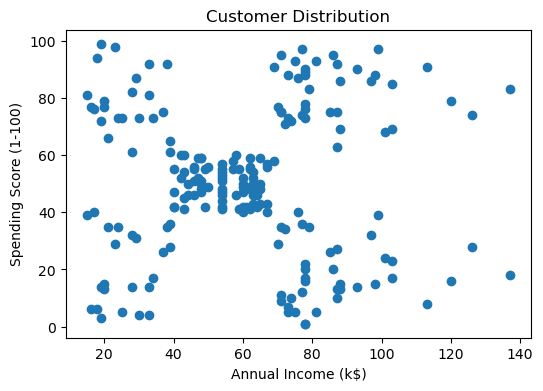

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(df['annual_income'], df['spending_score'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution")
plt.show()

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [24]:
scaled_data[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [32]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

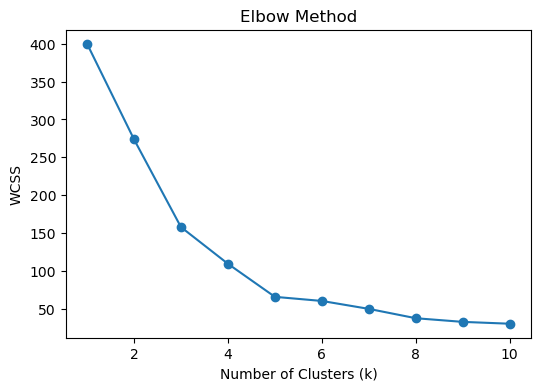

In [28]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

k Değeri Seçimi (Elbow Method)
Elbow grafiği incelendiğinde, k=5 değerinden sonra WCSS değerindeki
azalmanın belirgin şekilde yavaşladığı gözlemlenmiştir. Bu nedenle
küme sayısı 5 olarak seçilmiştir.


In [44]:
X = df[['annual_income',"spending_score"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=5,
    init="k-means++",
    random_state=42
)

clusters = kmeans.fit_predict(X_scaled)

In [48]:
print(X_scaled[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [50]:
df["Cluster"] = clusters
df.head()

,annual_income,spending_score,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [52]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [54]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

cluster_centers_df = pd.DataFrame(
    cluster_centers,
    columns=["Annual Income", "Spending Score"]
)

cluster_centers_df

,Annual Income,Spending Score
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


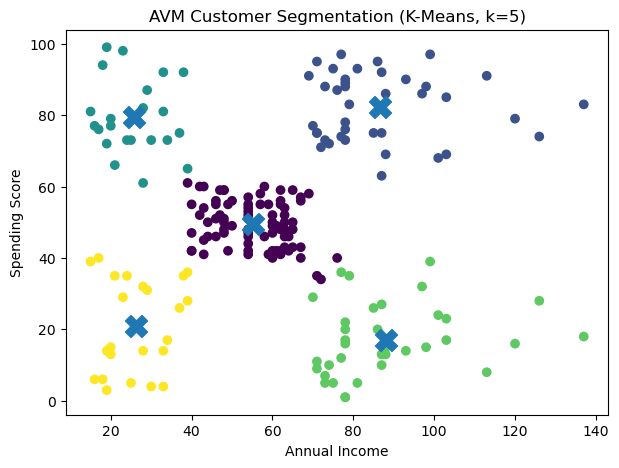

In [60]:
plt.figure(figsize=(7,5))

plt.scatter(
    df["annual_income"],
    df["spending_score"],
    c=df["Cluster"]
)

plt.scatter(
    cluster_centers_df["Annual Income"],
    cluster_centers_df["Spending Score"],
    s=250,
    marker="X"
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("AVM Customer Segmentation (K-Means, k=5)")
plt.show()


In [62]:
cluster_summary = df.groupby("Cluster").agg({
    "annual_income": "mean",
    "spending_score": "mean"
}).reset_index()

cluster_summary

,Cluster,annual_income,spending_score
0,0,55.296296,49.518519
1,1,86.538462,82.128205
2,2,25.727273,79.363636
3,3,88.200000,17.114286
4,4,26.304348,20.913043


In [64]:
cluster_centers_df

,Annual Income,Spending Score
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [68]:
cluster_names = {
    0: "Orta Gelir – Orta Harcama",
    1: "VIP Müşteriler (Zengin & Çok Harcayan)",
    2: "Düşük Gelir – Çok Harcayan",
    3: "Zengin ama Az Harcayanlar",
    4: "Düşük Gelir – Az Harcayan"
}

df["Segment"] = df["Cluster"].map(cluster_names)


In [70]:
df["Segment"].value_counts()

Segment
Orta Gelir – Orta Harcama                 81
VIP Müşteriler (Zengin & Çok Harcayan)    39
Zengin ama Az Harcayanlar                 35
Düşük Gelir – Az Harcayan                 23
Düşük Gelir – Çok Harcayan                22
Name: count, dtype: int64

In [72]:
df.head()

,annual_income,spending_score,Cluster,Segment
0,15,39,4,Düşük Gelir – Az Harcayan
1,15,81,2,Düşük Gelir – Çok Harcayan
2,16,6,4,Düşük Gelir – Az Harcayan
3,16,77,2,Düşük Gelir – Çok Harcayan
4,17,40,4,Düşük Gelir – Az Harcayan


In [74]:
segment_summary = df.groupby("Segment").agg({
    "annual_income": "mean",
    "spending_score": "mean",
    "Segment": "count"
}).rename(columns={"Segment": "customer_count"}).reset_index()

segment_summary

,Segment,annual_income,spending_score,customer_count
0,Düşük Gelir – Az Harcayan,26.304348,20.913043,23
1,Düşük Gelir – Çok Harcayan,25.727273,79.363636,22
2,Orta Gelir – Orta Harcama,55.296296,49.518519,81
3,VIP Müşteriler (Zengin & Çok Harcayan),86.538462,82.128205,39
4,Zengin ama Az Harcayanlar,88.200000,17.114286,35


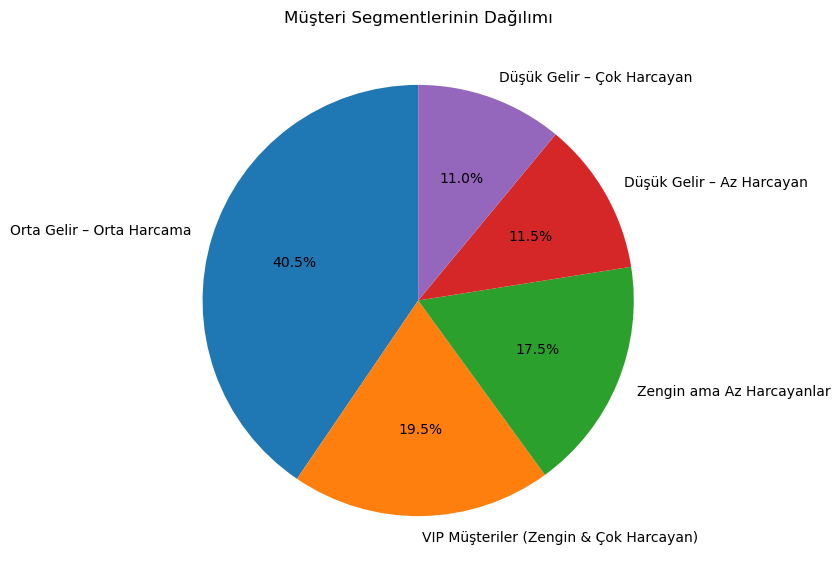

In [81]:
segment_counts = df["Segment"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Müşteri Segmentlerinin Dağılımı")
plt.show()


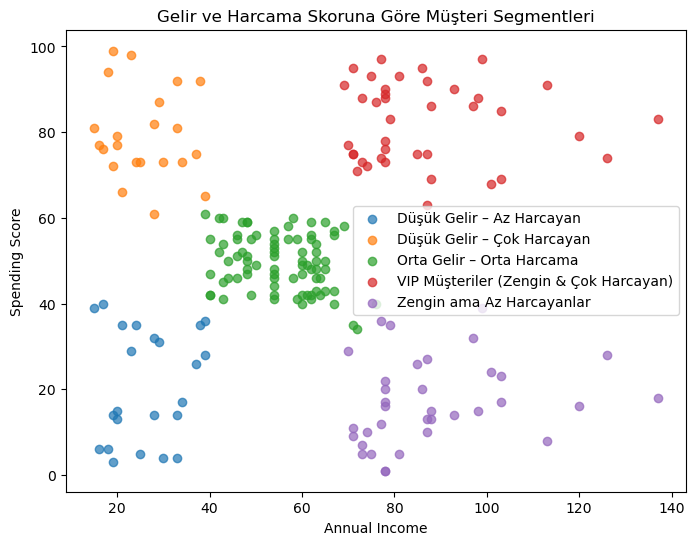

In [83]:
plt.figure(figsize=(8,6))

for segment in df["Segment"].unique():
    subset = df[df["Segment"] == segment]
    plt.scatter(
        subset["annual_income"],
        subset["spending_score"],
        label=segment,
        alpha=0.7
    )

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Gelir ve Harcama Skoruna Göre Müşteri Segmentleri")
plt.legend()
plt.show()


Bu projede, AVM müşteriler**yıllık gel** v**harcama sko * değişkenlerine göre
K-Means algoritması kullanılarak segmentlere ayrılmıştır.

Elbow yöntemi ile en uygun küme sası **= 5** olarak belirlenmiş ve müşteriler
benzer harcama davranışlarına göre gruplandırılmıştır.

Elde edilen segmentler, pazarlama kampanyalarının daha hedefli planlanmasına
ve müşteri değerine göre aksiyon alınmasına olanak sağlamaktadır.


Looker Studio için;

In [90]:
df.to_csv("mall_customers_segmented.csv", index=False)